In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read the dataset
heart_data = pd.read_csv('Heart.csv', index_col=0)

# Take a quick look at the dataframe
heart_data.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
# Assign Max Heart Rate as the predictor
x = heart_data['MaxHR']

# Assign AHD as the response variable
# Replace the string column values to 0 and 1
y = heart_data['AHD'].replace({'No':0,'Yes':1})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


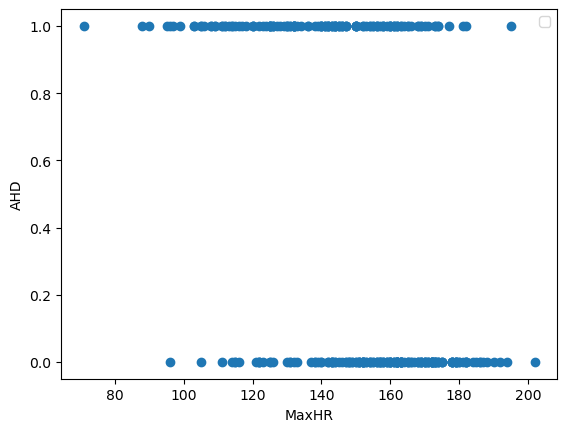

In [7]:
# Plot the predictor and reponse vairables as a scatter plot 
# with appropriate axes label
plt.scatter(x,y)
plt.xlabel('MaxHR')
plt.ylabel('AHD')
plt.legend(loc='best')


In [8]:
### edTest(test_affine) ###

# Function to perform affine transformation
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
    """
    # This works for scalar values only
    # Your code here
    z = w * x + b
    return z


In [9]:
### edTest(test_sigmoid) ###

# Function to apply sigmoid function on the parameter
def sigmoid(z):
    # Hint: numpy has an exponentiation function, np.exp()
    
    # Your code here
    h = 1/(1+np.exp(-z))
    return h

In [10]:
### edTest(test_neuron_predict) ###

# Function to combine the previous operations
def neuron_predict(x, w, b):

    # Call the previous functions
    # Your code here
    z = affine(x, w, b)
    h = sigmoid(z)
    return h

In [12]:
def accuracy(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    return sum(y_true == (y_pred >= 0.5).astype(int))/len(y_true)

Manually set the weight and bias parameters.
Recall from lecture that the weight changes the slope of the sigmoid and the bias shifts the function to the left or right.

In [13]:
# Hint: Try values between -1 and 1
weights = [-1, -0.6, -0.2, 0.2, 0.6, 1] 

# Hint: Try values between 50 and 100
biases = [50, 60, 70, 80, 90, 100]

# Initialize variables to store the best parameters
best_accuracy = 0
best_w = None
best_b = None

# Test all combinations of w and b
for w in weights:
    for b in biases:
        preds = neuron_predict(x, w, b)
        acc = accuracy(y, preds)
        if acc > best_accuracy:
            best_accuracy = acc
            best_w = w
            best_b = b

# Print the best parameters and the highest accuracy
print(f'Best Accuracy: {best_accuracy:.2%}')
print(f'Best w: {best_w}')
print(f'Best b: {best_b}')

Best Accuracy: 70.30%
Best w: -0.6
Best b: 90


In [14]:
# Hint: Try values between -1 and 1
weights = [-1, -0.6, -0.2, 0.2, 0.6, 1] 

# Hint: Try values between 50 and 100
biases = [50, 60, 70, 80, 90, 100]

# Initialize variables to store the best parameters
best_accuracy = 0
best_w = None
best_b = None

# Test all combinations of w and b
for w in weights:
    for b in biases:
        preds = neuron_predict(x, w, b)
        acc = accuracy(y, preds)
        if acc > best_accuracy:
            best_accuracy = acc
            best_w = w
            best_b = b

# Print the best parameters and the highest accuracy
print(f'Best Accuracy: {best_accuracy:.2%}')
print(f'Best w: {best_w}')
print(f'Best b: {best_b}')

Best Accuracy: 70.30%
Best w: -0.6
Best b: 90


In [15]:
# The forward mode or predict of a single neuron

# Create evenly spaced values of x to predict on
x_linspace = np.linspace(x.min(),x.max(),500) 
h = neuron_predict(x_linspace,best_w, best_b)

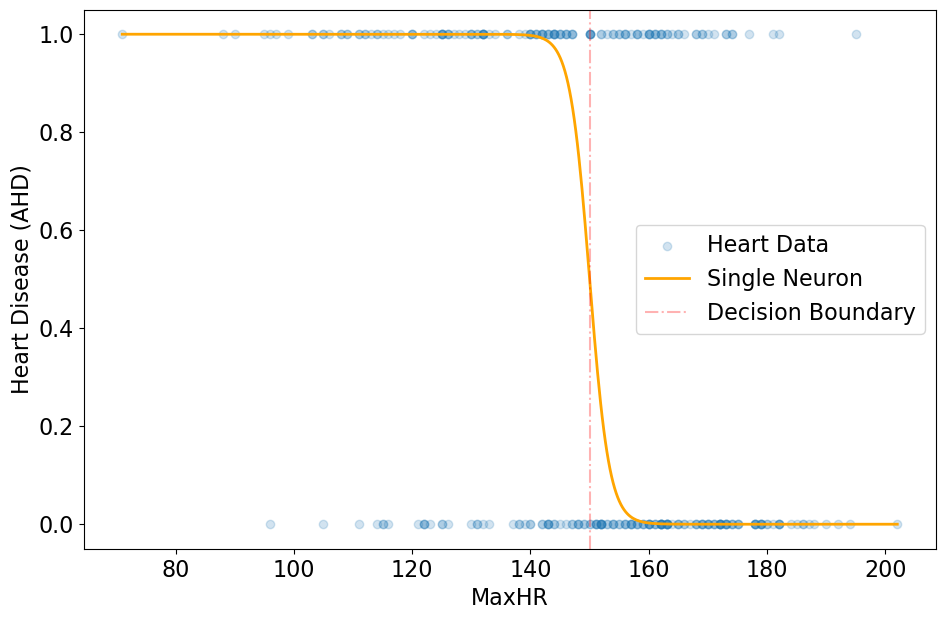

In [16]:
# Plot Predictions
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(x, y, label=r'Heart Data', alpha=0.2)
ax.plot(x_linspace, h, lw=2, c='orange', label=r'Single Neuron')

# First value in x_linspace with a probability < 0.5
db = x_linspace[np.argmax(h<0.5)] 
ax.axvline(x=db, alpha=0.3, linestyle='-.', c='r', label='Decision Boundary')

# Proper plot labels are very important!

# Make the tick labels big enough to read
ax.tick_params(labelsize=16)
plt.xlabel('MaxHR', fontsize=16)
plt.ylabel('Heart Disease (AHD)', fontsize=16)

# Create a legend and make it big enough to read
ax.legend(fontsize=16, loc='best') 
plt.show()


In [17]:
def loss(y_true, y_pred, eps=1e-15):
    assert y_true.shape[0] == y_pred.shape[0]
    
    # Clipping
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -sum(y_true*np.log(y_pred) + (1-y_true)*(np.log(1-y_pred)))

In [18]:
## Print the loss of the single neuron model
h = neuron_predict(x, best_w, best_b)
print(loss(y, h))

825.8970018862351


In [19]:
### edTest(test_performance) ###

# For the baseline predictions are all ones
baseline_acc = accuracy(y, np.ones(len(y)))     # type: ignore
perceptron_acc = accuracy(y, h)                 # type: ignore
print(f'Baseline Accuracy: {baseline_acc:.2%}')
print(f'Perceptron Accuracy: {perceptron_acc:.2%}')


Baseline Accuracy: 45.87%
Perceptron Accuracy: 70.30%
